In [29]:
#Importing the useful Libraries


#dataFrame manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# pd.set_option("Display.max_columns", None)
# pd.set_option("Display.max_rows", None)


#importing algorithms and scikit learn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## <span style="color:lightblue">**Problem Statement  1:**</span>
Load the "Breast_Cancer_Dataset.csv" dataset into a DataFrame and perform the following task:
1. Identify the null values and remove the null rows and columns by using the dropna() function
2. Encode the 'diagnosis' column using the LabelEncoder()
3. Considering the 'diagnosis' column as the target, separate the target variable and the feature vectors
4. Split the dataset into the training set and test set in a 70:30 ratio
5. Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also print their accuracies
6. Calculate and plot the confusion matrix

In [14]:
bc_df = pd.read_csv("./../Assignment_files/Assignment6/Breast_Cancer_Dataset.csv")
bc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
#Task1: identify the null values
print("number of duplicated entries:", bc_df.duplicated().sum())
print("shape of the dataset", bc_df.shape)
print(bc_df.isna().sum())

number of duplicated entries: 0
shape of the dataset (569, 33)
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetr

droping the null values using dropna()

In [16]:
# removing the null rows and columns by using the dropna() function
bc_df.dropna(axis=1, how="all", inplace=True)

In [17]:
#Task2: Encoding the "diagnosis" column
label_encoder = LabelEncoder()
encodings = label_encoder.fit_transform(bc_df["diagnosis"])
bc_df["diagnosis"] = encodings
#the mapping of values to the labels
# mapping_values = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# print(mapping_values)
bc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
#Task 3: Separating the target variable from the feature vectors
X = bc_df.drop("diagnosis", axis=1)
y = bc_df["diagnosis"]



#Task4: splitting the dataset into training set and test set in a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

initialise all the classifiers and mapp them to a variable using dict
loop, throught the iterms
    get the predictions and make an accucary prediction


In [31]:
models = {
    "log_reg" : LogisticRegression(),
    "gnb_clf" : GaussianNB(),
    "rdf_clf" : RandomForestClassifier(),
    "dt_clf" : DecisionTreeClassifier(),
    "knn_clf" : KNeighborsClassifier(),
    "sv_clf" : SVC()
}

model_confusionMatrix = {
    "log_reg" : None,
    "gnb_clf" : None,
    "rdf_clf" : None,
    "dt_clf" : None,
    "knn_clf" : None,
    "sv_clf" : None
}

In [38]:
for (name, model) in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"The training score for {name} is : {train_score}")
    print(f"The test score for {name} is : {test_score}")
    print("\n------\n")
    #Task 6 ploting the confusion matrix
    y_preds = model.predict(X_test)
    model_confusionMatrix[name] = confusion_matrix(y_test, y_preds)

The training score for log_reg is : 0.6482412060301508
The test score for log_reg is : 0.5789473684210527

------

The training score for gnb_clf is : 0.6482412060301508
The test score for gnb_clf is : 0.5789473684210527

------

The training score for rdf_clf is : 1.0
The test score for rdf_clf is : 0.9590643274853801

------

The training score for dt_clf is : 1.0
The test score for dt_clf is : 0.9122807017543859

------

The training score for knn_clf is : 0.8442211055276382
The test score for knn_clf is : 0.6549707602339181

------

The training score for sv_clf is : 0.6482412060301508
The test score for sv_clf is : 0.5789473684210527

------



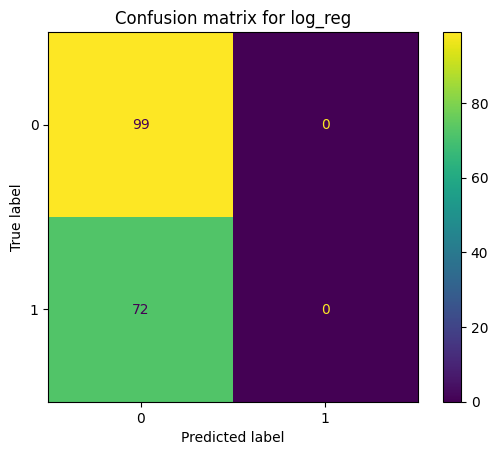

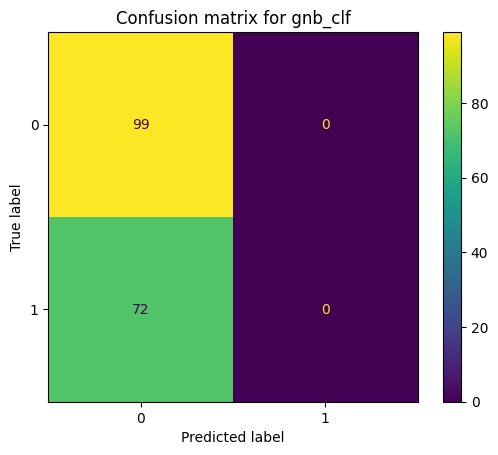

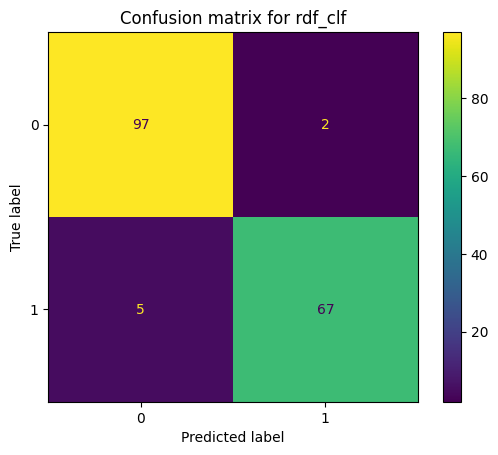

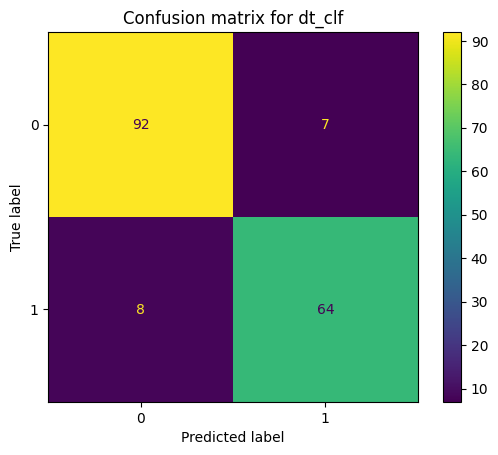

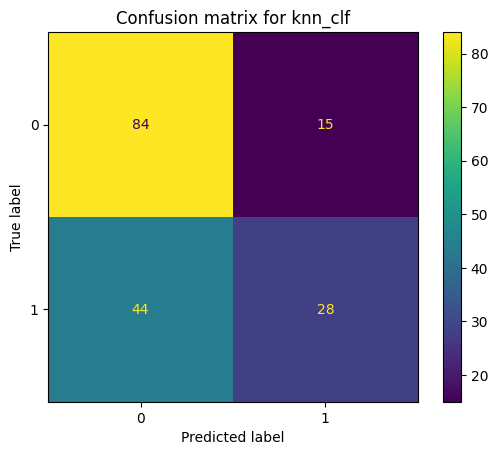

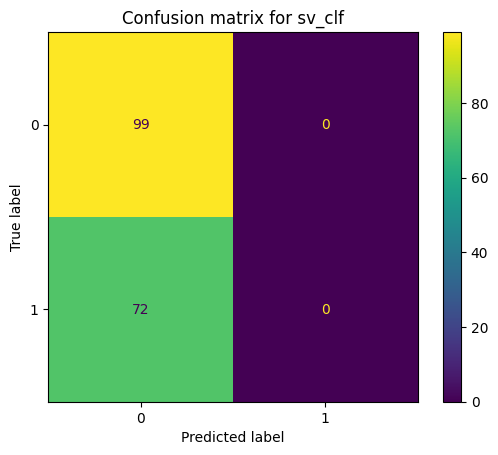

In [45]:
for (name, matrix) in model_confusionMatrix.items():
    disp = ConfusionMatrixDisplay(matrix)
    fig, ax = plt.subplots()
    disp.plot(ax=ax)
    ax.set_title(f"Confusion matrix for {name}")